In [74]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rc
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.font_manager as fm
import statsmodels.api as sm
%matplotlib inline

from statsmodels.stats.outliers_influence import variance_inflation_factor

import warnings
warnings.filterwarnings('ignore', category=RuntimeWarning)

rc('font', family='AppleGothic')

plt.rcParams['axes.unicode_minus'] = False

In [51]:
# 맥용
data = pd.read_csv('/Users/dongyokim/Library/Mobile Documents/com~apple~CloudDocs/2022:1/마케팅 애널리틱스/중간 과제/중간과제 데이터/EDA_dataset 오전 2.01.27.csv', index_col=0)

In [ ]:
# 윈도우용 
data = pd.read_csv('/Users/dongyokim/Library/Mobile Documents/com~apple~CloudDocs/2022:1/마케팅 애널리틱스/중간 과제/중간과제 데이터/EDA_dataset 오전 2.01.27.csv')

## 기초 EDA(Exploratory Data Analysis)
         
- 시각화는 대부분 태블로

In [5]:
data.shape

(2828072, 35)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2828072 entries, 0 to 2828071
Data columns (total 35 columns):
 #   Column                              Dtype  
---  ------                              -----  
 0   key                                 int64  
 1   apartment_id                        int64  
 2   city                                int64  
 3   transaction_date                    object 
 4   year_of_completion                  int64  
 5   exclusive_use_area                  float64
 6   floor                               int64  
 7   latitude_x                          float64
 8   longitude_x                         float64
 9   address_by_law                      int64  
 10  total_household_count_in_sites      int64  
 11  apartment_building_count_in_sites   int64  
 12  tallest_building_in_sites           float64
 13  lowest_building_in_sites            float64
 14  supply_area                         float64
 15  total_household_count_of_area_type  int64  
 16  

In [ ]:
# EDA에 추가 
# sns.distplot(data['transaction_real_price'])
# plt.title('Original Sale Price Histogram')
# plt.show()

In [ ]:
# EDA에 추가 
# plt.title('Log Transformed Sale Price Histogram')
# log_SalePrice = np.log1p(data['transaction_real_price'])
# sns.distplot(log_SalePrice)
# plt.show()

In [ ]:
print('데이터 세트의 Shape:', data.shape)
print('\n전체 피처의 type: \n', data.dtypes.value_counts())
isnull_series = data.isnull().sum()
print('\nNull 칼럼과 그 건수:\n ', isnull_series[isnull_series > 0].sort_values(ascending=False))

## 모델링용 데이터셋 구축 

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2828072 entries, 0 to 2828071
Data columns (total 35 columns):
 #   Column                              Dtype  
---  ------                              -----  
 0   key                                 int64  
 1   apartment_id                        int64  
 2   city                                int64  
 3   transaction_date                    object 
 4   year_of_completion                  int64  
 5   exclusive_use_area                  float64
 6   floor                               int64  
 7   latitude_x                          float64
 8   longitude_x                         float64
 9   address_by_law                      int64  
 10  total_household_count_in_sites      int64  
 11  apartment_building_count_in_sites   int64  
 12  tallest_building_in_sites           float64
 13  lowest_building_in_sites            float64
 14  supply_area                         float64
 15  total_household_count_of_area_type  int64  
 16  

In [52]:
data = data[['transaction_real_price', 'city', 'floor', 'total_household_count_in_sites', 'apartment_building_count_in_sites', 'tallest_building_in_sites', 'lowest_building_in_sites', 'total_household_count_of_area_type', 'room_count', 'bathroom_count', '해당 평형 이용 세대수 비율', '방 평수', '공급 면적 평수', '거래연도 기준 아파트 나이', '층 순위', '층 등급', '지하철 역까지의 거리']]

In [59]:
data.head()

,transaction_real_price,city,floor,total_household_count_in_sites,apartment_building_count_in_sites,tallest_building_in_sites,lowest_building_in_sites,total_household_count_of_area_type,room_count,bathroom_count,해당 평형 이용 세대수 비율,방 평수,공급 면적 평수,거래연도 기준 아파트 나이,층 순위,층 등급,지하철 역까지의 거리
0,168000000,1,8,585,5,14.0,9.0,201,2.0,1.0,0.343590,16.5468,21.8889,15,7.0,Medium,0.117411
1,165000000,1,11,919,7,15.0,11.0,284,2.0,1.0,0.309032,19.5596,26.4082,14,5.0,Royal,0.301313
2,280000000,1,7,919,7,15.0,11.0,112,4.0,2.0,0.121872,32.2526,38.6413,14,9.0,Medium,0.301313
3,415000000,1,10,461,9,23.0,6.0,82,3.0,2.0,0.177874,25.6399,31.5508,2,14.0,Medium,0.737813
4,415000000,1,10,461,9,23.0,6.0,82,3.0,2.0,0.177874,25.6399,31.5508,2,14.0,Medium,0.917269


In [53]:
data.describe()

,transaction_real_price,city,floor,total_household_count_in_sites,apartment_building_count_in_sites,tallest_building_in_sites,lowest_building_in_sites,total_household_count_of_area_type,room_count,bathroom_count,해당 평형 이용 세대수 비율,방 평수,공급 면적 평수,거래연도 기준 아파트 나이,층 순위,지하철 역까지의 거리
count,2.828072e+06,2.828072e+06,2.828072e+06,2.828072e+06,2.828072e+06,2.828072e+06,2.828072e+06,2.828072e+06,2.828072e+06,2.828072e+06,2.828072e+06,2.828072e+06,2.828072e+06,2.828072e+06,2.828072e+06,2.828072e+06
mean,4.238898e+08,6.599312e-01,1.031317e+01,1.297928e+03,1.370454e+01,2.108357e+01,1.411630e+01,3.169884e+02,2.888336e+00,1.533629e+00,3.140259e-01,2.361449e+01,3.041238e+01,1.581860e+01,1.177041e+01,1.075786e+00
std,3.558729e+08,4.737321e-01,7.688224e+00,1.205092e+03,1.583898e+01,1.008993e+01,7.578433e+00,3.557193e+02,7.083258e-01,5.175480e-01,2.439291e-01,8.770574e+00,1.051717e+01,8.829039e+00,8.385571e+00,6.344754e-01
min,7.290000e+06,0.000000e+00,-4.000000e+00,9.900000e+01,1.000000e+00,5.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,5.066000e+00,6.080300e+00,1.000000e+00,-4.000000e+00,4.934935e-03
25%,2.000000e+08,0.000000e+00,5.000000e+00,4.360000e+02,4.000000e+00,1.500000e+01,9.000000e+00,9.100000e+01,3.000000e+00,1.000000e+00,1.315315e-01,1.803200e+01,2.382490e+01,9.000000e+00,6.000000e+00,5.748755e-01
50%,3.255900e+08,1.000000e+00,9.000000e+00,8.950000e+02,9.000000e+00,1.900000e+01,1.300000e+01,2.090000e+02,3.000000e+00,2.000000e+00,2.610250e-01,2.501070e+01,3.066140e+01,1.500000e+01,1.100000e+01,9.718436e-01
75%,5.280000e+08,1.000000e+00,1.400000e+01,1.764000e+03,1.700000e+01,2.500000e+01,1.700000e+01,4.140000e+02,3.000000e+00,2.000000e+00,4.376731e-01,2.570360e+01,3.363500e+01,2.200000e+01,1.500000e+01,1.475684e+00
max,8.200000e+09,1.000000e+00,8.000000e+01,6.864000e+03,1.240000e+02,8.000000e+01,7.000000e+01,2.960000e+03,7.000000e+00,5.000000e+00,1.076487e+00,8.936880e+01,1.280785e+02,5.700000e+01,7.800000e+01,3.854837e+00


In [54]:
data.corr()['transaction_real_price'].sort_values(ascending=False)

transaction_real_price                1.000000
공급 면적 평수                              0.568657
방 평수                                  0.567089
room_count                            0.405400
bathroom_count                        0.360525
city                                  0.337807
apartment_building_count_in_sites     0.276730
tallest_building_in_sites             0.234934
total_household_count_in_sites        0.209542
lowest_building_in_sites              0.174171
floor                                 0.167502
층 순위                                  0.129112
거래연도 기준 아파트 나이                       -0.026818
total_household_count_of_area_type   -0.046263
지하철 역까지의 거리                          -0.060223
해당 평형 이용 세대수 비율                      -0.201397
Name: transaction_real_price, dtype: float64

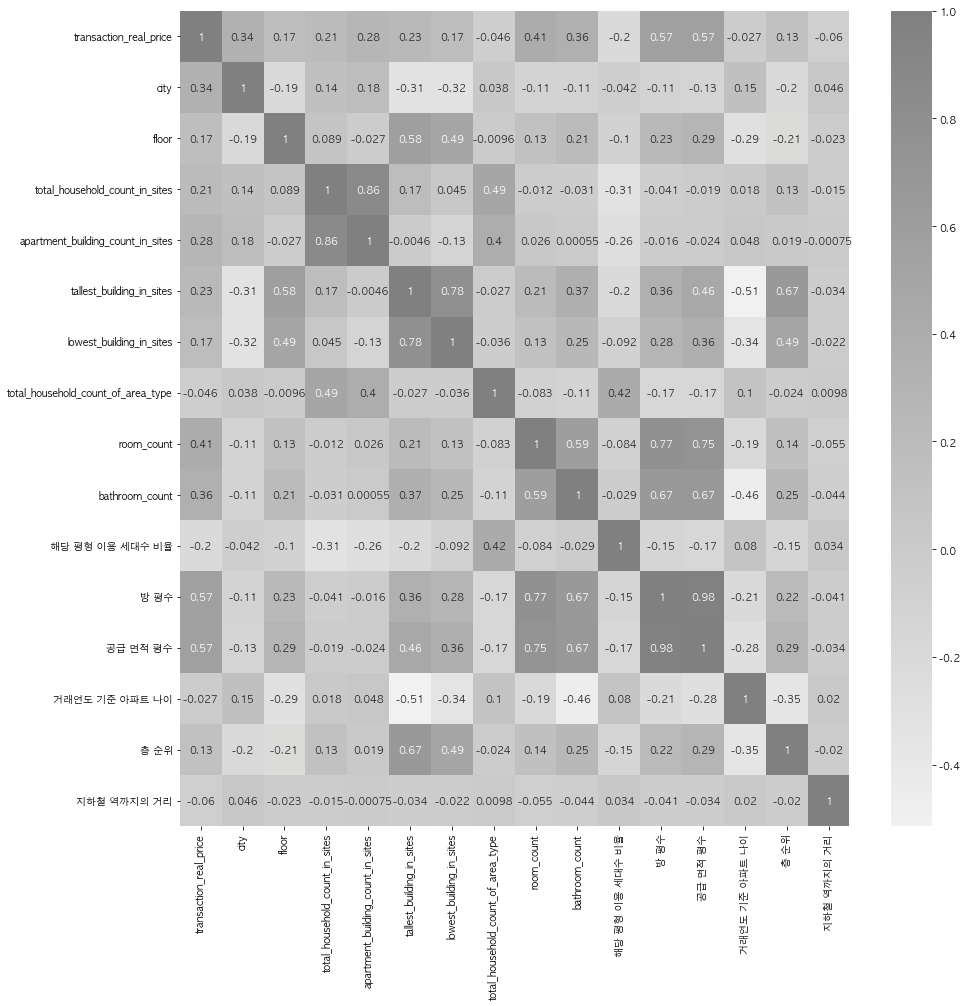

In [55]:
plt.figure(figsize=(15, 15))
cmap = sns.light_palette("gray", as_cmap=True)
sns.heatmap(data.corr(), annot=True, cmap=cmap)
plt.show()

In [60]:
# VIF를 통한 다중공선성 확인 
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(
    data.drop(columns=['층 등급'],axis=1).values, i) for i in range(data.drop(columns=['층 등급'],axis=1).shape[1])]
vif["features"] = data.drop(columns=['층 등급'],axis=1).columns
vif

,VIF Factor,features
0,2.438354,transaction_real_price
1,1.658580,city
2,3822.050844,floor
3,6.603516,total_household_count_in_sites
4,5.208358,apartment_building_count_in_sites
5,6680.262437,tallest_building_in_sites
6,2.807191,lowest_building_in_sites
7,2.509126,total_household_count_of_area_type
8,2.601154,room_count
9,2.392664,bathroom_count


In [61]:
# 다중공선성이 매우 높은 변수 삭제 
data.drop(columns=['층 순위', '공급 면적 평수'], axis=1, inplace=True)

In [62]:
# VIF를 통한 다중공선성 확인 
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(
    data.drop(columns=['층 등급'],axis=1).values, i) for i in range(data.drop(columns=['층 등급'],axis=1).shape[1])]
vif["features"] = data.drop(columns=['층 등급'],axis=1).columns
vif

# 양호해졌다. 

,VIF Factor,features
0,5.177150,transaction_real_price
1,1.323102,city
2,1.531183,floor
3,6.570317,total_household_count_in_sites
4,5.035233,apartment_building_count_in_sites
5,3.751237,tallest_building_in_sites
6,2.770943,lowest_building_in_sites
7,2.477454,total_household_count_of_area_type
8,2.081743,room_count
9,2.193312,bathroom_count


In [66]:
# 더미 변수 생성 

data = pd.get_dummies(data, columns=['층 등급'])
data.head()

,transaction_real_price,city,floor,total_household_count_in_sites,apartment_building_count_in_sites,tallest_building_in_sites,lowest_building_in_sites,total_household_count_of_area_type,room_count,bathroom_count,해당 평형 이용 세대수 비율,방 평수,거래연도 기준 아파트 나이,지하철 역까지의 거리,층 등급_Low,층 등급_Medium,층 등급_Royal
0,168000000,1,8,585,5,14.0,9.0,201,2.0,1.0,0.343590,16.5468,15,0.117411,0,1,0
1,165000000,1,11,919,7,15.0,11.0,284,2.0,1.0,0.309032,19.5596,14,0.301313,0,0,1
2,280000000,1,7,919,7,15.0,11.0,112,4.0,2.0,0.121872,32.2526,14,0.301313,0,1,0
3,415000000,1,10,461,9,23.0,6.0,82,3.0,2.0,0.177874,25.6399,2,0.737813,0,1,0
4,415000000,1,10,461,9,23.0,6.0,82,3.0,2.0,0.177874,25.6399,2,0.917269,0,1,0


In [68]:
data.drop(columns=['층 등급_Royal'], axis=1, inplace=True)

In [75]:
# bias 추가
data = sm.add_constant(data, has_constant='add')

In [78]:
X = data.drop(columns=['transaction_real_price'], axis=1)
y = data['transaction_real_price']

In [79]:
# 학습데이터셋 검증데이터셋 구축 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [81]:
# Train the MLR / 회귀모델적합
full_model = sm.OLS(y_train, X_train)
fitted_full_model = full_model.fit()

fitted_full_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                              
==================================================================================
Dep. Variable:     transaction_real_price   R-squared:                       0.587
Model:                                OLS   Adj. R-squared:                  0.587
Method:                     Least Squares   F-statistic:                 1.878e+05
Date:                    Tue, 07 Jun 2022   Prob (F-statistic):               0.00
Time:                            03:00:10   Log-Likelihood:            -4.0914e+07
No. Observations:                 1979650   AIC:                         8.183e+07
Df Residuals:                     1979634   BIC:                         8.183e+07
Df Model:                              15                                         
Covariance Type:                nonrobust                                         
======================================================================================================
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
const                              -6.375e+08   1.28e+06   -497.333      0.000    -6.4e+08   -6.35e+08
city                                3.257e+08   3.75e+05    869.619      0.000    3.25e+08    3.26e+08
floor                               3.091e+06   5.05e+04     61.180      0.000    2.99e+06    3.19e+06
total_household_count_in_sites      -6.54e+04    343.353   -190.470      0.000   -6.61e+04   -6.47e+04
apartment_building_count_in_sites   9.389e+06   2.23e+04    420.734      0.000    9.34e+06    9.43e+06
tallest_building_in_sites           5.687e+06   3.91e+04    145.526      0.000    5.61e+06    5.76e+06
lowest_building_in_sites            5.446e+06   3.57e+04    152.512      0.000    5.38e+06    5.52e+06
total_household_count_of_area_type -3.309e+04    723.430    -45.737      0.000   -3.45e+04   -3.17e+04
room_count                          -3.28e+06   3.69e+05     -8.878      0.000      -4e+06   -2.56e+06
bathroom_count                      1.169e+07   4.84e+05     24.132      0.000    1.07e+07    1.26e+07
해당 평형 이용 세대수 비율                    -2.074e+07   9.75e+05    -21.266      0.000   -2.27e+07   -1.88e+07
방 평수                                 2.12e+07   3.41e+04    621.113      0.000    2.11e+07    2.13e+07
거래연도 기준 아파트 나이                      6.328e+06   2.41e+04    262.865      0.000    6.28e+06    6.38e+06
지하철 역까지의 거리                        -3.028e+07   2.57e+05   -117.677      0.000   -3.08e+07   -2.98e+07
층 등급_Low                            2.166e+07   7.92e+05     27.359      0.000    2.01e+07    2.32e+07
층 등급_Medium                         2.146e+07   5.18e+05     41.391      0.000    2.04e+07    2.25e+07
==============================================================================
Omnibus:                  1460501.550   Durbin-Watson:                   1.999
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         70472214.950
Skew:                           3.070   Prob(JB):                         0.00
Kurtosis:                      31.577   Cond. No.                     1.54e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.54e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [86]:
# 변수 선택법 
def processSubset(X,y, feature_set):
            model = sm.OLS(y,X[list(feature_set)]) # Modeling
            regr = model.fit() # 모델 학습
            AIC = regr.aic # 모델의 AIC
            return {"model":regr, "AIC":AIC}
import time
import itertools
# getBest: 가장 낮은 AIC를 가지는 모델 선택 및 저장
def getBest(X,y,k):
    tic = time.time() # 시작시간
    results = [] # 결과 저장공간
    for combo in itertools.combinations(X.columns.difference(['const']), k): # 각 변수조합을 고려한 경우의 수
        combo=(list(combo)+['const'])
        
        results.append(processSubset(X,y,feature_set=combo))  # 모델링된 것들을 저장
    models = pd.DataFrame(results) # 데이터 프레임으로 변환
    # 가장 낮은 AIC를 가지는 모델 선택 및 저장
    best_model = models.loc[models['AIC'].argmin()] # index
    toc = time.time() # 종료시간
    print("Processed ", models.shape[0], "models on", k, "predictors in", (toc - tic),
          "seconds.")
    return best_model    

In [88]:
########전진선택법(step=1)

def forward(X, y, predictors):
    # 데이터 변수들이 미리정의된 predictors에 있는지 없는지 확인 및 분류
    remaining_predictors = [p for p in X.columns.difference(['const']) if p not in predictors]
    tic = time.time()
    results = []
    for p in remaining_predictors:
        results.append(processSubset(X=X, y= y, feature_set=predictors+[p]+['const']))
    # 데이터프레임으로 변환
    models = pd.DataFrame(results)

    # AIC가 가장 낮은 것을 선택
    best_model = models.loc[models['AIC'].argmin()] # index
    toc = time.time()
    print("Processed ", models.shape[0], "models on", len(predictors)+1, "predictors in", (toc-tic))
    print('Selected predictors:',best_model['model'].model.exog_names,' AIC:',best_model[0] )
    return best_model

#### 전진선택법 모델

def forward_model(X,y):
    Fmodels = pd.DataFrame(columns=["AIC", "model"])
    tic = time.time()
    # 미리 정의된 데이터 변수
    predictors = []
    # 변수 1~10개 : 0~9 -> 1~10
    for i in range(1, len(X.columns.difference(['const'])) + 1):
        Forward_result = forward(X=X,y=y,predictors=predictors)
        if i > 1:
            if Forward_result['AIC'] > Fmodel_before:
                break
        Fmodels.loc[i] = Forward_result
        predictors = Fmodels.loc[i]["model"].model.exog_names
        Fmodel_before = Fmodels.loc[i]["AIC"]
        predictors = [ k for k in predictors if k != 'const']
    toc = time.time()
    print("Total elapsed time:", (toc - tic), "seconds.")

    return(Fmodels['model'][len(Fmodels['model'])])

In [98]:
######## 후진선택법(step=1)
def backward(X,y,predictors):
    tic = time.time()
    results = []
    # 데이터 변수들이 미리정의된 predictors 조합 확인
    for combo in itertools.combinations(predictors, len(predictors) - 1):
        results.append(processSubset(X=X, y= y,feature_set=list(combo)+['const']))
    models = pd.DataFrame(results)
    # 가장 낮은 AIC를 가진 모델을 선택
    best_model = models.loc[models['AIC'].argmin()]
    toc = time.time()
    print("Processed ", models.shape[0], "models on", len(predictors) - 1, "predictors in",
          (toc - tic))
    print('Selected predictors:',best_model['model'].model.exog_names,' AIC:',best_model[0] )
    return best_model

# 후진 소거법 모델
def backward_model(X, y):
    Bmodels = pd.DataFrame(columns=["AIC", "model"], index = range(1,len(X.columns)))
    tic = time.time()
    predictors = X.columns.difference(['const'])
    Bmodel_before = processSubset(X,y,predictors)['AIC']
    while (len(predictors) > 1):
        Backward_result = backward(X=X_train, y= y_train, predictors = predictors)
        if Backward_result['AIC'] > Bmodel_before:
            break
        Bmodels.loc[len(predictors) - 1] = Backward_result
        predictors = Bmodels.loc[len(predictors) - 1]["model"].model.exog_names
        Bmodel_before = Backward_result['AIC']
        predictors = [ k for k in predictors if k != 'const']

    toc = time.time()
    print("Total elapsed time:", (toc - tic), "seconds.")
    return (Bmodels['model'].dropna().iloc[0])


In [90]:
def Stepwise_model(X,y):
    Stepmodels = pd.DataFrame(columns=["AIC", "model"])
    tic = time.time()
    predictors = []
    Smodel_before = processSubset(X,y,predictors+['const'])['AIC']
    # 변수 1~10개 : 0~9 -> 1~10
    for i in range(1, len(X.columns.difference(['const'])) + 1):
        Forward_result = forward(X=X, y=y, predictors=predictors) # constant added
        print('forward')
        Stepmodels.loc[i] = Forward_result
        predictors = Stepmodels.loc[i]["model"].model.exog_names
        predictors = [ k for k in predictors if k != 'const']
        Backward_result = backward(X=X, y=y, predictors=predictors)
        if Backward_result['AIC']< Forward_result['AIC']:
            Stepmodels.loc[i] = Backward_result
            predictors = Stepmodels.loc[i]["model"].model.exog_names
            Smodel_before = Stepmodels.loc[i]["AIC"]
            predictors = [ k for k in predictors if k != 'const']
            print('backward')
        if Stepmodels.loc[i]['AIC']> Smodel_before:
            break
        else:
            Smodel_before = Stepmodels.loc[i]["AIC"]
    toc = time.time()
    print("Total elapsed time:", (toc - tic), "seconds.")
    return (Stepmodels['model'][len(Stepmodels['model'])])

In [92]:
Forward_best_model = forward_model(X=X_train, y= y_train)

Processed  15 models on 1 predictors in 2.953300952911377
Selected predictors: ['방 평수', 'const']  AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x2e73c1e50>
Processed  14 models on 2 predictors in 3.87893009185791
Selected predictors: ['방 평수', 'city', 'const']  AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x2e73c15e0>
Processed  13 models on 3 predictors in 4.846597909927368
Selected predictors: ['방 평수', 'city', 'apartment_building_count_in_sites', 'const']  AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x2a5b2dcd0>
Processed  12 models on 4 predictors in 5.570528745651245
Selected predictors: ['방 평수', 'city', 'apartment_building_count_in_sites', 'lowest_building_in_sites', 'const']  AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x2e73c1cd0>
Processed  11 models on 5 predictors in 6.049627065658569
Selected predictors: ['방 평수', 'city', 'apartment_building_count_i

In [99]:
Backward_best_model = backward_model(X=X_train,y=y_train)   

Processed  15 models on 14 predictors in 23.936907052993774
Selected predictors: ['apartment_building_count_in_sites', 'bathroom_count', 'city', 'floor', 'lowest_building_in_sites', 'tallest_building_in_sites', 'total_household_count_in_sites', 'total_household_count_of_area_type', '거래연도 기준 아파트 나이', '방 평수', '지하철 역까지의 거리', '층 등급_Low', '층 등급_Medium', '해당 평형 이용 세대수 비율', 'const']  AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x2e73f6160>
Processed  14 models on 13 predictors in 18.951982021331787
Selected predictors: ['apartment_building_count_in_sites', 'bathroom_count', 'city', 'floor', 'lowest_building_in_sites', 'tallest_building_in_sites', 'total_household_count_in_sites', 'total_household_count_of_area_type', '거래연도 기준 아파트 나이', '방 평수', '지하철 역까지의 거리', '층 등급_Low', '층 등급_Medium', 'const']  AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x2ac28ba30>
Total elapsed time: 46.1228461265564 seconds.


In [100]:
Stepwise_best_model=Stepwise_model(X=X_train,y=y_train)   

Processed  15 models on 1 predictors in 2.8083839416503906
Selected predictors: ['방 평수', 'const']  AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x2e73f6220>
forward
Processed  1 models on 0 predictors in 0.08000493049621582
Selected predictors: ['const']  AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x2ae02b610>
Processed  14 models on 2 predictors in 3.8520030975341797
Selected predictors: ['방 평수', 'city', 'const']  AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x2e73c12b0>
forward
Processed  2 models on 1 predictors in 0.37200498580932617
Selected predictors: ['방 평수', 'const']  AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x2ca263e50>
Processed  13 models on 3 predictors in 4.744253158569336
Selected predictors: ['방 평수', 'city', 'apartment_building_count_in_sites', 'const']  AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x2c311d

Processed  2 models on 14 predictors in 2.7869019508361816
Selected predictors: ['방 평수', 'city', 'apartment_building_count_in_sites', 'lowest_building_in_sites', '거래연도 기준 아파트 나이', 'tallest_building_in_sites', 'total_household_count_in_sites', '지하철 역까지의 거리', 'total_household_count_of_area_type', 'floor', '층 등급_Medium', '층 등급_Low', 'bathroom_count', '해당 평형 이용 세대수 비율', 'const']  AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x2ac619b80>
forward
Processed  14 models on 13 predictors in 19.626235008239746
Selected predictors: ['방 평수', 'city', 'apartment_building_count_in_sites', 'lowest_building_in_sites', '거래연도 기준 아파트 나이', 'tallest_building_in_sites', 'total_household_count_in_sites', '지하철 역까지의 거리', 'total_household_count_of_area_type', 'floor', '층 등급_Medium', '층 등급_Low', 'bathroom_count', 'const']  AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x2e73c1e50>
Processed  1 models on 15 predictors in 1.4059300422668457
Selected pred

In [101]:
# 모델에 의해 예측된/추정된 값 <->  X_test
pred_y_full = fitted_full_model.predict(X_test)
pred_y_forward = Forward_best_model.predict(X_test[Forward_best_model.model.exog_names])
pred_y_backward = Backward_best_model.predict(X_test[Backward_best_model.model.exog_names])
pred_y_stepwise = Stepwise_best_model.predict(X_test[Stepwise_best_model.model.exog_names])

In [102]:
perf_mat = pd.DataFrame(columns=["ALL", "FORWARD", "BACKWARD", "STEPWISE"],
                        index =['MSE', 'RMSE','MAE', 'MAPE'])

def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
from sklearn import metrics

In [103]:
# 성능지표
perf_mat.loc['MSE']['ALL'] = metrics.mean_squared_error(y_test,pred_y_full)
perf_mat.loc['MSE']['FORWARD'] = metrics.mean_squared_error(y_test,pred_y_forward)
perf_mat.loc['MSE']['BACKWARD'] = metrics.mean_squared_error(y_test,pred_y_backward)
perf_mat.loc['MSE']['STEPWISE'] = metrics.mean_squared_error(y_test,pred_y_stepwise)

perf_mat.loc['RMSE']['ALL'] = np.sqrt(metrics.mean_squared_error(y_test, pred_y_full))
perf_mat.loc['RMSE']['FORWARD'] = np.sqrt(metrics.mean_squared_error(y_test, pred_y_forward))
perf_mat.loc['RMSE']['BACKWARD'] = np.sqrt(metrics.mean_squared_error(y_test, pred_y_backward))
perf_mat.loc['RMSE']['STEPWISE'] = np.sqrt(metrics.mean_squared_error(y_test, pred_y_stepwise))

perf_mat.loc['MAE']['ALL'] = metrics.mean_absolute_error(y_test, pred_y_full)
perf_mat.loc['MAE']['FORWARD'] = metrics.mean_absolute_error(y_test, pred_y_forward)
perf_mat.loc['MAE']['BACKWARD'] = metrics.mean_absolute_error(y_test, pred_y_backward)
perf_mat.loc['MAE']['STEPWISE'] = metrics.mean_absolute_error(y_test, pred_y_stepwise)

perf_mat.loc['MAPE']['ALL'] = mean_absolute_percentage_error(y_test, pred_y_full)
perf_mat.loc['MAPE']['FORWARD'] = mean_absolute_percentage_error(y_test, pred_y_forward)
perf_mat.loc['MAPE']['BACKWARD'] = mean_absolute_percentage_error(y_test, pred_y_backward)
perf_mat.loc['MAPE']['STEPWISE'] = mean_absolute_percentage_error(y_test, pred_y_stepwise)

print(perf_mat)

                      ALL              FORWARD             BACKWARD  \
MSE   51672631494022920.0  51672631494023464.0  51673953566222928.0   
RMSE     227316148.775275     227316148.775276     227319056.759927   
MAE      149377303.096751     149377303.097257     149334090.028766   
MAPE            47.641837            47.641837            47.620092   

                 STEPWISE  
MSE   51672631494023464.0  
RMSE     227316148.775276  
MAE      149377303.097257  
MAPE            47.641837  


In [105]:
Backward_best_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                              
==================================================================================
Dep. Variable:     transaction_real_price   R-squared:                       0.587
Model:                                OLS   Adj. R-squared:                  0.587
Method:                     Least Squares   F-statistic:                 2.012e+05
Date:                    Tue, 07 Jun 2022   Prob (F-statistic):               0.00
Time:                            03:23:03   Log-Likelihood:            -4.0914e+07
No. Observations:                 1979650   AIC:                         8.183e+07
Df Residuals:                     1979635   BIC:                         8.183e+07
Df Model:                              14                                         
Covariance Type:                nonrobust                                         
======================================================================================================
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
apartment_building_count_in_sites    9.39e+06   2.23e+04    420.775      0.000    9.35e+06    9.43e+06
bathroom_count                      1.104e+07   4.79e+05     23.054      0.000    1.01e+07     1.2e+07
city                                 3.26e+08   3.73e+05    874.190      0.000    3.25e+08    3.27e+08
floor                               3.093e+06   5.05e+04     61.219      0.000    2.99e+06    3.19e+06
lowest_building_in_sites            5.471e+06   3.56e+04    153.674      0.000     5.4e+06    5.54e+06
tallest_building_in_sites           5.705e+06    3.9e+04    146.186      0.000    5.63e+06    5.78e+06
total_household_count_in_sites     -6.545e+04    343.314   -190.637      0.000   -6.61e+04   -6.48e+04
total_household_count_of_area_type -3.342e+04    722.477    -46.257      0.000   -3.48e+04    -3.2e+04
거래연도 기준 아파트 나이                      6.339e+06    2.4e+04    263.665      0.000    6.29e+06    6.39e+06
방 평수                                2.101e+07   2.67e+04    786.412      0.000     2.1e+07    2.11e+07
지하철 역까지의 거리                         -3.02e+07   2.57e+05   -117.450      0.000   -3.07e+07   -2.97e+07
층 등급_Low                            2.164e+07   7.92e+05     27.332      0.000    2.01e+07    2.32e+07
층 등급_Medium                         2.145e+07   5.18e+05     41.385      0.000    2.04e+07    2.25e+07
해당 평형 이용 세대수 비율                    -2.061e+07   9.75e+05    -21.136      0.000   -2.25e+07   -1.87e+07
const                              -6.426e+08   1.15e+06   -560.985      0.000   -6.45e+08    -6.4e+08
==============================================================================
Omnibus:                  1461496.664   Durbin-Watson:                   1.999
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         70746204.389
Skew:                           3.072   Prob(JB):                         0.00
Kurtosis:                      31.634   Cond. No.                     1.42e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.42e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""